In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm

pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [3]:
dataset_original =  pd.read_csv("./competencia_03.csv.gz")

In [4]:
#dataset = dataset_original.copy()
meses_usar = [201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202012, 202101, 202102, 202103, 202106, 202107, 202109]
dataset = dataset_original[dataset_original['foto_mes'].isin(meses_usar)]
#dataset_baseline = dataset_original[((dataset_original['foto_mes'] >= 201903) & (dataset_original['foto_mes'] <= 201910)) | (dataset_original['foto_mes'] == 202107)]
#dataset = dataset_original.copy()

In [5]:
dataset.set_index('foto_mes', inplace=True)

In [6]:
#df_roto_cero_null = ((dataset.isnull() | (dataset == 0)).groupby('foto_mes').mean() * 100).round(2)
#df_roto_cero_null = df_roto_cero_null[df_roto_cero_null.columns[df_roto_cero_null.eq(100).any()]].stack().reset_index()
#df_roto_cero_null.columns = ['foto_mes', 'columna', 'porcentagem']
#df_roto_cero_null = df_roto_cero_null[df_roto_cero_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [7]:
df_roto_cero_bruto = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_cero = df_roto_cero_bruto[df_roto_cero_bruto.columns[df_roto_cero_bruto.eq(100).any()]].stack().reset_index()
df_roto_cero.columns = ['foto_mes', 'columna', 'porcentagem']
df_roto_cero = df_roto_cero[df_roto_cero['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [8]:
#df_roto_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)
#df_roto_null = df_roto_null[df_roto_null.columns[df_roto_null.eq(100).any()]].stack().reset_index()
#df_roto_null.columns = ['foto_mes', 'columna', 'porcentagem']
#df_roto_null = df_roto_null[df_roto_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [9]:
#count_df_roto_cero_null = df_roto_cero_null.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
#plt.figure(figsize=(8, 4))
#sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero_null, palette='viridis')
#plt.title('Quantidade de columnas com 100% de Valores Nulos ou cero por Foto_mes')
#plt.xlabel('Foto_mes')
#plt.ylabel('Quantidade de columnas Únicas')
#plt.xticks(rotation='vertical')
#for index, value in enumerate(count_df_roto_cero_null['quantidade_columnas']):
#    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
#plt.show()

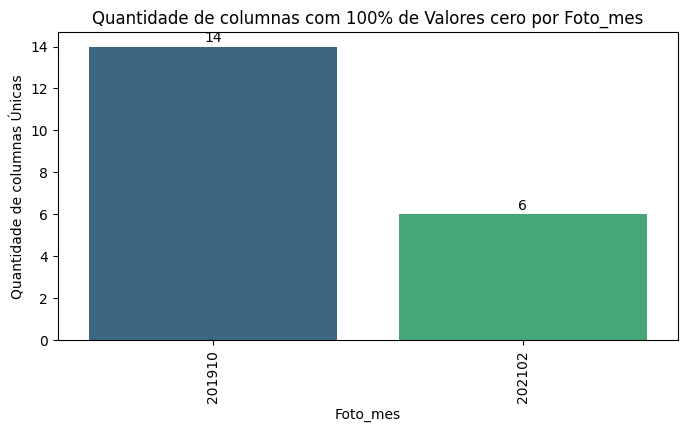

In [10]:
count_df_roto_cero = df_roto_cero.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero, palette='viridis')
plt.title('Quantidade de columnas com 100% de Valores cero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de columnas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_cero['quantidade_columnas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [11]:
#count_df_roto_null = df_roto_null.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
#plt.figure(figsize=(8, 4))
#sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_null, palette='viridis')
#plt.title('Quantidade de columnas com 100% de Valores nulos por Foto_mes')
#plt.xlabel('Foto_mes')
#plt.ylabel('Quantidade de columnas Únicas')
#plt.xticks(rotation='vertical')
#for index, value in enumerate(count_df_roto_null['quantidade_columnas']):
#    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
#plt.show()

In [12]:
#Exclui os valores de cmobile_app_trx e tmobile_app para os anos de 201901 ate 201906 porque todos os valores estao null, talvez nao tinha essa funcionalidade na epoca no sistema

#merged_df = pd.merge(count_df_roto_cero_null, count_df_roto_null, on='foto_mes', how='outer', suffixes=('_cero', '_null'))
#merged_df = merged_df.fillna(0)
#merged_df['quantidade_columnas'] =  merged_df['quantidade_columnas_cero'] - merged_df['quantidade_columnas_null']

In [13]:

#plt.figure(figsize=(8, 4))
#sns.barplot(x='foto_mes', y='quantidade_columnas', data=merged_df, palette='viridis')
#plt.title('Quantidade de columnas com 100% de Valores nulos e zerados por Foto_mes')
#plt.xlabel('Foto_mes')
#plt.ylabel('Quantidade de columnas Únicas')
#plt.xticks(rotation='vertical')
#for index, value in enumerate(merged_df['quantidade_columnas']):
#    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
#plt.show()

In [14]:
columnas_imputar = df_roto_cero['columna'].unique()

In [15]:
dataset[columnas_imputar] = dataset[columnas_imputar].replace(0, np.nan)

/var/folders/rz/cr5j7s253gzd4kgkncpwqkg00000gp/T/ipykernel_76269/2732953549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnas_imputar] = dataset[columnas_imputar].replace(0, np.nan)


In [16]:
dataset[columnas_imputar].isna().sum()   

mrentabilidad                   141652
chomebanking_transacciones      642876
mcomisiones_otras               193722
ccomisiones_otras               193642
mtarjeta_master_descuentos     2197149
mtarjeta_visa_descuentos       2135701
ctarjeta_visa_descuentos       2076249
ctarjeta_master_descuentos     2160794
ccajeros_propios_descuentos    2144741
mpasivos_margen                 162045
mactivos_margen                 228023
mcomisiones                     193932
mrentabilidad_annual            140922
mcajeros_propios_descuentos    2159450
dtype: int64

In [17]:
#dataset_imputar = dataset.copy()
dataset_lightgbm = dataset.copy()

In [18]:
#dataset_imputar[columnas_imputar].isna().sum()

In [19]:
#dataset_imputar[columnas_imputar] = dataset_imputar[columnas_imputar].replace(0, np.nan)

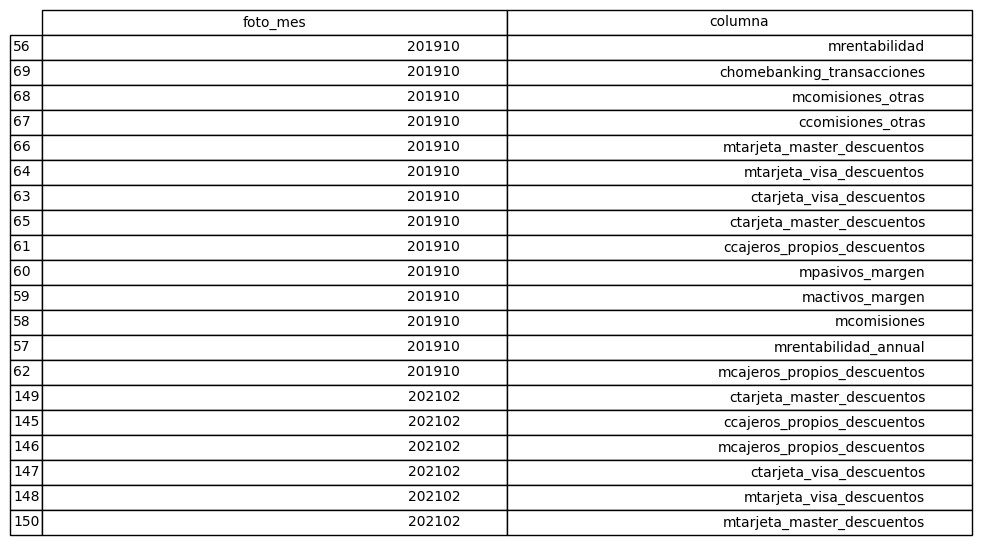

In [20]:
df_selecionado = df_roto_cero.drop(columns='porcentagem')
df_selecionado = df_selecionado.rename(columns={'columna': 'columna'})

fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, df_selecionado, loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  # Ajusta a escala da tabela

plt.savefig('tabela_exportada.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [21]:
df_roto_pos_input_na = dataset_lightgbm.copy()
#df_roto_pos_input_media.set_index('foto_mes', inplace=True)
df_roto_pos_input_na = ((df_roto_pos_input_na == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_pos_input_na = df_roto_pos_input_na.stack().reset_index()
df_roto_pos_input_na.columns = ['foto_mes', 'columna', 'porcentagem_cero_antes']
df_roto_pos_input_na = pd.merge(df_roto_cero, df_roto_pos_input_na, on=['foto_mes', 'columna'], how='left')
df_roto_pos_input_na.columns = ['foto_mes', 'columna', 'porcentagem_cero_antes', 'porcentagem_cero_ahora']
df_roto_pos_input_na.sort_values(by=['porcentagem_cero_ahora'], inplace=True, ascending=False)


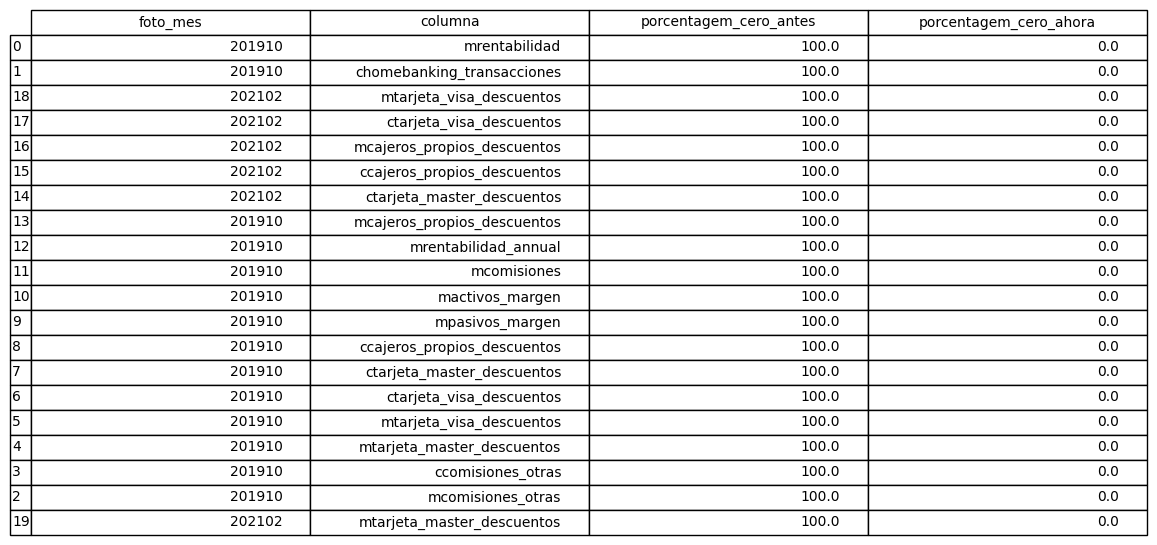

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, df_roto_pos_input_na, loc='center', colWidths=[0.3] * len(df_roto_pos_input_na.columns))

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  

plt.savefig('Resumen estadistico.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [23]:
#dataset_imputar[columnas_imputar].mean()
#dataset_imputar.sort_values(by=['numero_de_cliente', 'foto_mes'], inplace=True)

#dataset_inputado_media_cliente = dataset_imputar.copy()
#dataset_inputado_mediana_cliente = dataset_imputar.copy()

#dataset_inputado_media_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.mean()))
#dataset_inputado_mediana_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.median()))


In [24]:
#dataset_inputado_media_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.tail(3).mean()))

In [25]:
#dataset_inputado_mediana_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.tail(3).median()))

In [26]:
#dataset_inputado_media_cliente[columnas_imputar] = dataset_inputado_media_cliente[columnas_imputar].fillna(0)
#dataset_inputado_mediana_cliente[columnas_imputar] = dataset_inputado_mediana_cliente[columnas_imputar].fillna(0)

In [27]:
dataset_lightgbm.reset_index(inplace=True)
dataset_lightgbm.to_csv('./dataset_lightgbm.csv.gz', index=False)